# [Your full name goes here]
# Programming Exercise \#2
---

# Preamble

In [742]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [743]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [744]:
telemetry = pd.read_csv('Data/iot_telemetry_dataset.csv')
telemetry.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


### (a)

The learning task is supervised because we are told that each device resides in a different location: 00:0f:00:70:91:0a | stable conditions, cooler and more humid, 1c:bf:ce:15:ec:4d | highly variable temperature and humidity,  b8:27:eb:bf:9d:51 | stable conditions, warmer and dryer. Because we know the environmental conditions, we know the output, which indicates that it is a supervised learning task.

### (b)

In [745]:
print(telemetry.shape[0])

405184


### (c)



In [746]:
print(telemetry[telemetry['device'] == '00:0f:00:70:91:0a'].shape[0])

111815



### (d)

In [747]:
print(telemetry[telemetry['device'] == '1c:bf:ce:15:ec:4d'].shape[0])

105918


### (e)

In [748]:
print(telemetry[telemetry['device'] == 'b8:27:eb:bf:9d:51'].shape[0])

187451


## Problem 1.2

### (a)

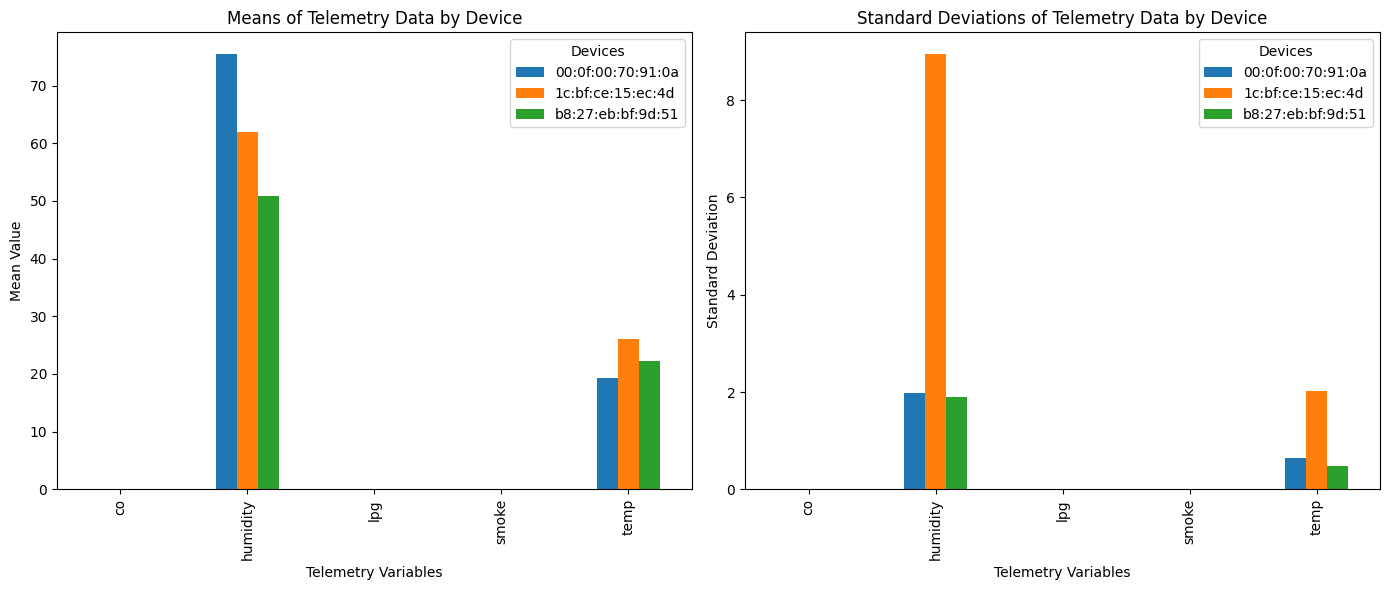

In [749]:
devices = ('00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51')
telemetry_columns = [col for col in telemetry.columns if col not in ['ts', 'device', 'light', 'motion']]

# Calculate means and standard deviations for each device
means_0 = telemetry.loc[telemetry['device'] == devices[0], telemetry_columns].mean()
means_1 = telemetry.loc[telemetry['device'] == devices[1], telemetry_columns].mean()
means_2 = telemetry.loc[telemetry['device'] == devices[2], telemetry_columns].mean()

std_0 = telemetry.loc[telemetry['device'] == devices[0], telemetry_columns].std()
std_1 = telemetry.loc[telemetry['device'] == devices[1], telemetry_columns].std()
std_2 = telemetry.loc[telemetry['device'] == devices[2], telemetry_columns].std()

# Create DataFrames for means and standard deviations
means_df = pd.DataFrame({
    '00:0f:00:70:91:0a': means_0,
    '1c:bf:ce:15:ec:4d': means_1,
    'b8:27:eb:bf:9d:51': means_2
})

std_df = pd.DataFrame({
    '00:0f:00:70:91:0a': std_0,
    '1c:bf:ce:15:ec:4d': std_1,
    'b8:27:eb:bf:9d:51': std_2
})

# Plot grouped bar chart for Means and Standard Deviations
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot means
means_df.plot(kind='bar', ax=ax[0], legend=True)
ax[0].set_title('Means of Telemetry Data by Device')
ax[0].set_ylabel('Mean Value')
ax[0].set_xlabel('Telemetry Variables')
ax[0].legend(title='Devices')

# Plot standard deviations
std_df.plot(kind='bar', ax=ax[1], legend=True)
ax[1].set_title('Standard Deviations of Telemetry Data by Device')
ax[1].set_ylabel('Standard Deviation')
ax[1].set_xlabel('Telemetry Variables')
ax[1].legend(title='Devices')

plt.tight_layout()
plt.show()


One observation to note is that the variance on device 1c:bf:ce:15:ec:4d is much higher compared to the others for humidity and temperature. Another thing to note is that since the mean and standard deviation values for humidity and temperature are much higher than that of the other variables, those 2 variables stand out the most in the bar plots.

### (b)

In [750]:
for device in devices:
    for col in telemetry_columns:
        telemetry.loc[telemetry['device'] == device, col] = (telemetry.loc[telemetry['device'] == device, col]-means_df[device][col])/std_df[device][col]
telemetry.head(10)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,-1.080793,0.098428,False,-1.093491,False,-1.091260,0.871610
1,1.594512e+09,00:0f:00:70:91:0a,-0.464451,0.281222,False,-0.458333,False,-0.460392,0.524162
2,1.594512e+09,b8:27:eb:bf:9d:51,-1.044864,0.045488,False,-1.056107,False,-1.054137,0.664099
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.687051,1.664629,True,0.696248,False,0.694633,0.480890
4,1.594512e+09,b8:27:eb:bf:9d:51,-1.060344,0.045488,False,-1.072209,False,-1.070127,0.664099
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.649527,1.787605,True,0.659043,False,0.657370,0.480890
6,1.594512e+09,b8:27:eb:bf:9d:51,-1.044841,0.045488,False,-1.056083,False,-1.054113,0.664099
7,1.594512e+09,00:0f:00:70:91:0a,-0.398156,0.281222,False,-0.383561,False,-0.387058,0.524162
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.507419,1.787605,True,0.517887,False,0.516039,0.480890
9,1.594512e+09,b8:27:eb:bf:9d:51,-1.055167,0.045488,False,-1.066824,False,-1.064779,0.664099



### (c)

In [751]:
telemetry = pd.get_dummies(telemetry, columns=['device', 'light', 'motion'], prefix=['DEVICE', 'LIGHT', 'MOTION'])

### (d)

In [752]:
telemetry.head(20)

,ts,co,humidity,lpg,smoke,temp,DEVICE_00:0f:00:70:91:0a,DEVICE_1c:bf:ce:15:ec:4d,DEVICE_b8:27:eb:bf:9d:51,LIGHT_False,LIGHT_True,MOTION_False,MOTION_True
0,1.594512e+09,-1.080793,0.098428,-1.093491,-1.091260,0.871610,False,False,True,True,False,True,False
1,1.594512e+09,-0.464451,0.281222,-0.458333,-0.460392,0.524162,True,False,False,True,False,True,False
2,1.594512e+09,-1.044864,0.045488,-1.056107,-1.054137,0.664099,False,False,True,True,False,True,False
3,1.594512e+09,0.687051,1.664629,0.696248,0.694633,0.480890,False,True,False,False,True,True,False
4,1.594512e+09,-1.060344,0.045488,-1.072209,-1.070127,0.664099,False,False,True,True,False,True,False
5,1.594512e+09,0.649527,1.787605,0.659043,0.657370,0.480890,False,True,False,False,True,True,False
6,1.594512e+09,-1.044841,0.045488,-1.056083,-1.054113,0.664099,False,False,True,True,False,True,False
7,1.594512e+09,-0.398156,0.281222,-0.383561,-0.387058,0.524162,True,False,False,True,False,True,False
8,1.594512e+09,0.507419,1.787605,0.517887,0.516039,0.480890,False,True,False,False,True,True,False
9,1.594512e+09,-1.055167,0.045488,-1.066824,-1.064779,0.664099,False,False,True,True,False,True,False


### (e)

The timestamp of the reading is simply an id that allows us to see what time is associated with the data. Because it is used more as an ID, it doesn't make sense to process it.

## Problem 1.3

In [753]:

telemetry['mean'] = telemetry[telemetry_columns].mean(axis=1)
telemetry['gmean'] = sps.gmean(abs(telemetry[telemetry_columns]).values, axis=1)
telemetry['hmean'] = sps.hmean(abs(telemetry[telemetry_columns]).values, axis=1)
telemetry['variance'] = telemetry[telemetry_columns].var(axis=1)
telemetry['kurtosis'] = sps.kurtosis(telemetry[telemetry_columns].values, axis=1)
telemetry['skew'] = sps.skew(telemetry[telemetry_columns].values, axis=1)
display(telemetry.head(40))

,ts,co,humidity,lpg,smoke,temp,DEVICE_00:0f:00:70:91:0a,DEVICE_1c:bf:ce:15:ec:4d,DEVICE_b8:27:eb:bf:9d:51,LIGHT_False,LIGHT_True,MOTION_False,MOTION_True,mean,gmean,hmean,variance,kurtosis,skew
0,1.594512e+09,-1.080793,0.098428,-1.093491,-1.091260,0.871610,False,False,True,True,False,True,False,-0.459101,0.643851,0.355540,0.817552,-1.268521,0.673607
1,1.594512e+09,-0.464451,0.281222,-0.458333,-0.460392,0.524162,True,False,False,True,False,True,False,-0.115558,0.428502,0.417687,0.231202,-1.626008,0.504156
2,1.594512e+09,-1.044864,0.045488,-1.056107,-1.054137,0.664099,False,False,True,True,False,True,False,-0.489104,0.511869,0.189809,0.641322,-1.365727,0.626984
3,1.594512e+09,0.687051,1.664629,0.696248,0.694633,0.480890,False,True,False,False,True,True,False,0.844690,0.767316,0.713105,0.218513,0.083334,1.347752
4,1.594512e+09,-1.060344,0.045488,-1.072209,-1.070127,0.664099,False,False,True,True,False,True,False,-0.498619,0.516485,0.190115,0.654782,-1.374738,0.622674
5,1.594512e+09,0.649527,1.787605,0.659043,0.657370,0.480890,False,True,False,False,True,True,False,0.846887,0.752883,0.692806,0.282264,0.157954,1.420887
6,1.594512e+09,-1.044841,0.045488,-1.056083,-1.054113,0.664099,False,False,True,True,False,True,False,-0.489090,0.511862,0.189809,0.641303,-1.365713,0.626990
7,1.594512e+09,-0.398156,0.281222,-0.383561,-0.387058,0.524162,True,False,False,True,False,True,False,-0.072678,0.387290,0.379765,0.195721,-1.589427,0.520788
8,1.594512e+09,0.507419,1.787605,0.517887,0.516039,0.480890,False,True,False,False,True,True,False,0.761968,0.650609,0.589734,0.328947,0.246717,1.497492
9,1.594512e+09,-1.055167,0.045488,-1.066824,-1.064779,0.664099,False,False,True,True,False,True,False,-0.495437,0.514944,0.190014,0.650264,-1.371752,0.624102


# **2. Empirical Risk Minimization and the Law of Large Numbers**

## Problem 2.1

### (a)

In [754]:
rolls = [1, 2, 3, 4, 5, 6]
sample_means = []
for i in range (10000):
    sample_means.append(np.random.choice(rolls, i+1).mean())


### (b)

In [755]:
E_D = np.mean(rolls)
absolute_discrepancy = [abs(sample_mean - E_D) for sample_mean in sample_means]


### (c)



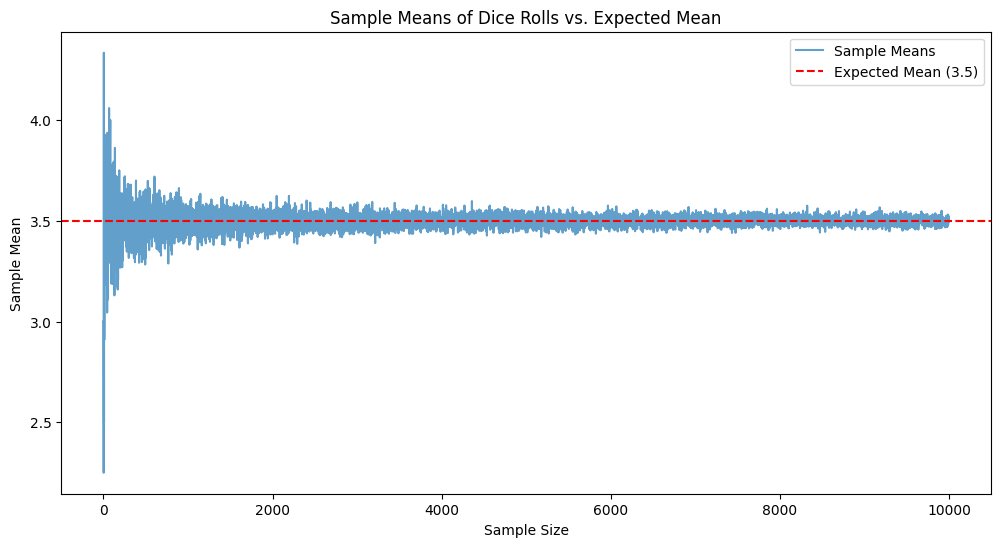

In [756]:
plt.figure(figsize=(12, 6))
plt.plot(sample_means, label='Sample Means', alpha=0.7)
plt.axhline(y=E_D, color='r', linestyle='--', label='Expected Mean (3.5)')

# Add labels, title, and legend
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.title('Sample Means of Dice Rolls vs. Expected Mean')
plt.legend()

# Display the plot
plt.show()

It can be seen from the graph that the sample mean varies much more when the sample size is smaller compared to that of when the sample size is larger. Although the graph shows that it doesn't reach the exact empirical mean, it gets really close to it as the sample size increases.

### (d)

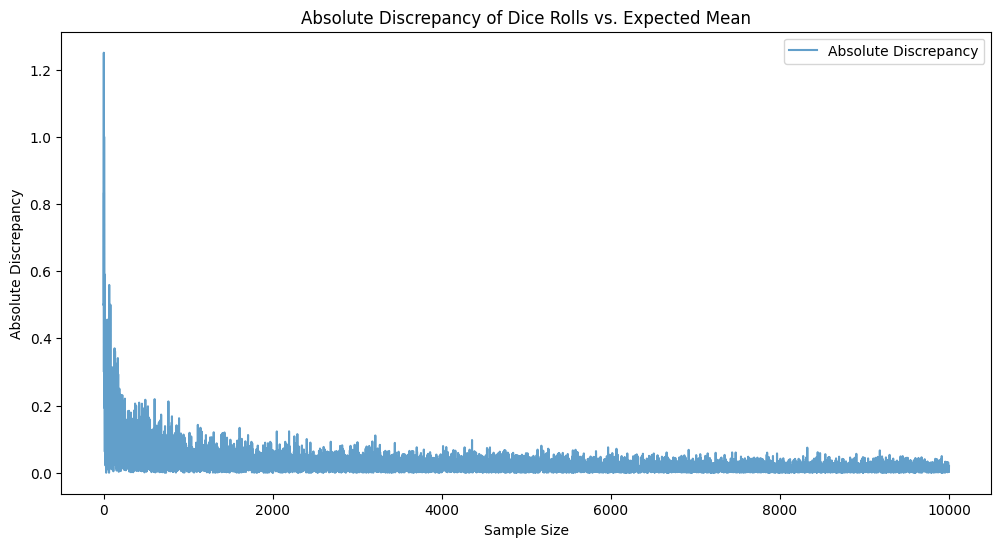

In [757]:
plt.figure(figsize=(12, 6))
plt.plot(absolute_discrepancy, label='Absolute Discrepancy', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Sample Size')
plt.ylabel('Absolute Discrepancy')
plt.title('Absolute Discrepancy of Dice Rolls vs. Expected Mean')
plt.legend()

# Display the plot
plt.show()

One thing to note from the plot is as the sample size gets larger, the absolute difference between the sample mean and the empirical mean decreases almost to 0. What this goes to show from the Law of Large Numbers is that as the Sample Size increases to infinity, the absolute discrepancy between the sample mean and empirical mean decreases to 0.

## Problem 2.2

### (a)

In [758]:
rolls = [1, 2, 3, 4, 5, 6]
die_probabilities = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
sample_means_unfair = []
for i in range (10000):
    sample_means_unfair.append(np.random.choice(rolls, i+1, p=die_probabilities).mean())

[6.0,
 3.5,
 4.0,
 4.75,
 4.8,
 3.3333333333333335,
 4.714285714285714,
 4.125,
 5.111111111111111,
 4.5,
 4.545454545454546,
 5.166666666666667,
 5.153846153846154,
 5.0,
 4.8,
 5.125,
 4.9411764705882355,
 4.111111111111111,
 4.368421052631579,
 4.9,
 4.666666666666667,
 4.7272727272727275,
 5.086956521739131,
 4.416666666666667,
 4.76,
 4.769230769230769,
 3.962962962962963,
 4.785714285714286,
 4.068965517241379,
 4.633333333333334,
 4.354838709677419,
 4.375,
 4.303030303030303,
 3.8823529411764706,
 4.171428571428572,
 4.361111111111111,
 4.45945945945946,
 4.894736842105263,
 4.128205128205129,
 4.75,
 4.585365853658536,
 4.571428571428571,
 3.953488372093023,
 4.386363636363637,
 4.4222222222222225,
 4.217391304347826,
 4.851063829787234,
 4.625,
 4.918367346938775,
 4.44,
 4.294117647058823,
 4.730769230769231,
 4.490566037735849,
 4.222222222222222,
 4.4363636363636365,
 3.9642857142857144,
 4.824561403508772,
 4.241379310344827,
 4.762711864406779,
 4.133333333333334,
 4.377

### (b)

In [759]:
E_D_unfair = rolls[0]*0.1+rolls[1]*0.1+rolls[2]*0.1+rolls[3]*0.1+rolls[4]*0.1+rolls[5]*0.5
print(E_D_unfair)
absolute_discrepancy_unfair = [abs(sample_mean - E_D_unfair) for sample_mean in sample_means_unfair]

4.5


### (c)

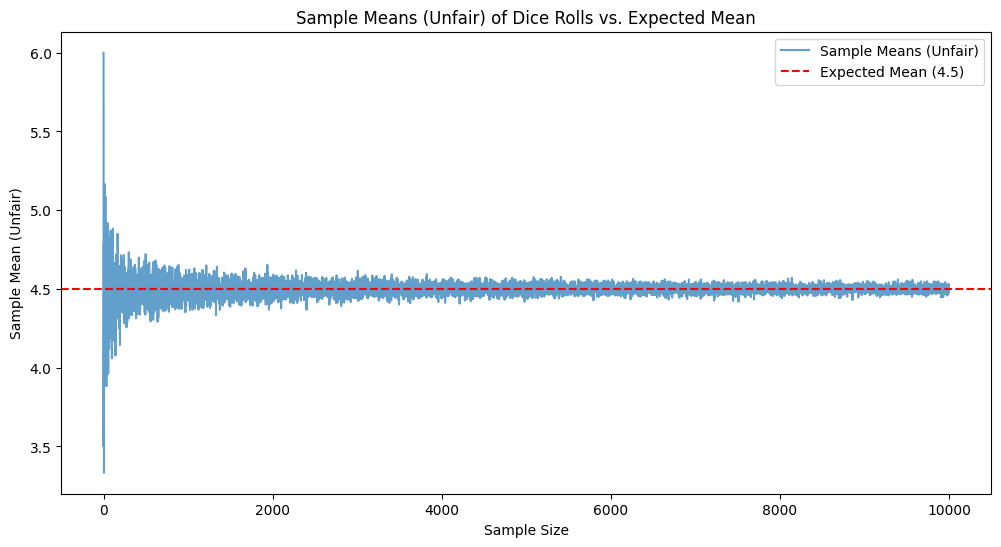

In [760]:
plt.figure(figsize=(12, 6))
plt.plot(sample_means_unfair, label='Sample Means (Unfair)', alpha=0.7)
plt.axhline(y=E_D_unfair, color='r', linestyle='--', label=f'Expected Mean ({E_D_unfair})')

# Add labels, title, and legend
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean (Unfair)')
plt.title('Sample Means (Unfair) of Dice Rolls vs. Expected Mean')
plt.legend()

# Display the plot
plt.show()

One thing to note about the empirical average of an unfair die is that even though the probabilities of landing each face are different, when the sample size increases, the sample mean still approaches that of the empirical mean, similar to the graph of 2.1(c).

### (d)

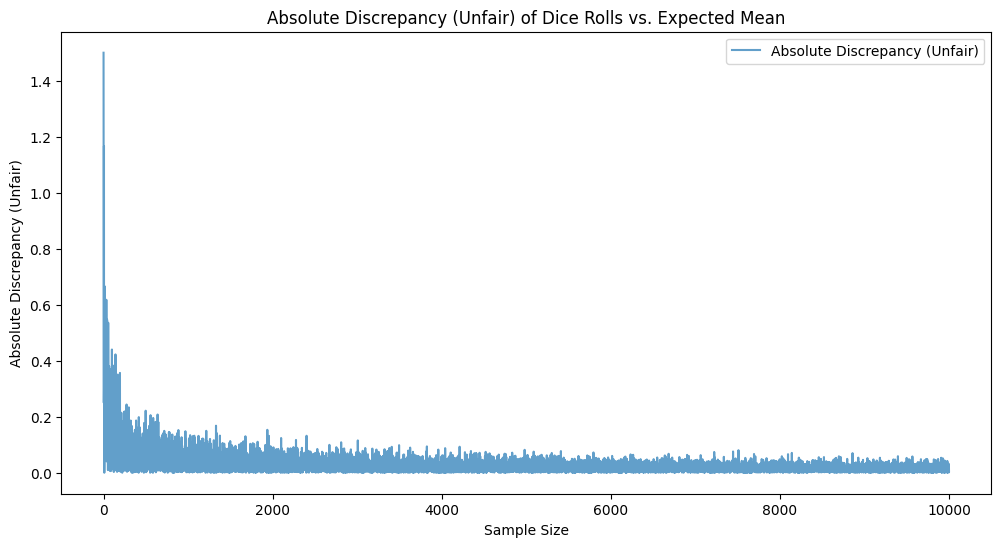

: 

In [761]:
plt.figure(figsize=(12, 6))
plt.plot(absolute_discrepancy_unfair, label='Absolute Discrepancy (Unfair)', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Sample Size')
plt.ylabel('Absolute Discrepancy (Unfair)')
plt.title('Absolute Discrepancy (Unfair) of Dice Rolls vs. Expected Mean')
plt.legend()

# Display the plot
plt.show()

The result is similar to that of 2.1(d): As the sample size increases to infinity, the absolute difference between the sample mean and the empirical mean decreases to 0.